<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center">Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Multilabel Clasification</h2>
<div>

### Imports

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.datasets import make_circles, make_moons, make_blobs

### Plotting functions

In [2]:
def subplot_points(x, y, ax, title):
    ax.scatter(x[y==0, 0], x[y==0, 1], c="skyblue", label="zeros")
    ax.scatter(x[y==1, 0], x[y==1, 1], c="salmon",  label="ones")
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.axis("equal")
    ax.set_title(title)
    ax.legend(loc="upper right")
    
def plot_points(x, y):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    fig.suptitle('Multilabel classification')
    subplot_points(x, y[:,0], ax1, "Y1")
    subplot_points(x, y[:,1], ax2, "Y2")

### Syntatic data: XOR

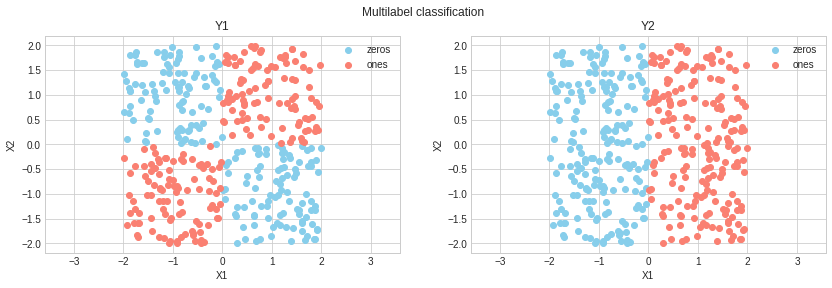

In [3]:
def xor_data(points:int, low, high):
    
    center = (high+low)/2    
    cluster_points = points // 4
    
    x1 = np.vstack(( np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)),
                     np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)) ))

    x2 = np.vstack(( np.random.uniform(low=center, high=high, size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)),
                     np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=low, high=center,  size=(cluster_points,1)) ))

    x = np.hstack((x1,x2))

    y1 = np.vstack(( np.zeros((cluster_points,1)),
                     np.ones((cluster_points,1)),
                     np.ones((cluster_points,1)),
                     np.zeros((cluster_points,1)) ))
    
    y2 = np.vstack(( np.zeros((cluster_points,1)),
                     np.ones((cluster_points,1)),
                     np.zeros((cluster_points,1)),
                     np.ones((cluster_points,1)) ))
    
    y = np.hstack((y1,y2))

    
    return x,y

x,y = xor_data(points=400, low=-2, high=2)

plot_points(x,y)

### TF

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

### Model
- Try `"relu"` and `"swish"`

In [5]:
inputs = keras.Input(shape=(2,), name="INPUT")
layer1 = layers.Dense(4, activation='swish', kernel_initializer="he_uniform", bias_initializer="zeros", name='HIDDEN_1')(inputs)
layer2 = layers.Dense(3, activation='swish', kernel_initializer="he_uniform", bias_initializer="zeros", name='HIDDEN_2')(layer1)
layer3 = layers.Dense(2, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(layer2)

model = keras.Model(inputs=inputs, outputs=layer3)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
HIDDEN_1 (Dense)             (None, 4)                 12        
_________________________________________________________________
HIDDEN_2 (Dense)             (None, 3)                 15        
_________________________________________________________________
OUTPUT (Dense)               (None, 2)                 8         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
all_w1 = []
all_w2 = []
all_b1 = []
all_b2 = []

def save_weights_per_epoch(batch, logs):
    global all_w1
    global all_w2
    
    w1, b1 = model.layers[1].get_weights()
    w2, b2 = model.layers[2].get_weights()
    
    all_w1.append(w1)
    all_w2.append(w2)
    all_b1.append(b1)
    all_b2.append(b2)

In [7]:
model.compile(loss      = "binary_crossentropy", # "hinge"
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['binary_accuracy', 'categorical_accuracy'])

train_hist = model.fit(x, y,
                       epochs=1000,
                       batch_size=64,
                       callbacks=[keras.callbacks.LambdaCallback(on_epoch_begin=save_weights_per_epoch)])

Epoch 1/1000
7/7 [==============================] - 1s 2ms/step - loss: 0.5261 - binary_accuracy: 0.7191 - categorical_accuracy: 0.7890
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4913 - binary_accuracy: 0.7313 - categorical_accuracy: 0.8530
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4741 - binary_accuracy: 0.7344 - categorical_accuracy: 0.8585
Epoch 4/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.4531 - binary_accuracy: 0.7638 - categorical_accuracy: 0.8690
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4248 - binary_accuracy: 0.7752 - categorical_accuracy: 0.8760
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4299 - binary_accuracy: 0.7625 - categorical_accuracy: 0.8644
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.4154 - binary_accuracy: 0.7737 - categorical_accuracy: 0.8703
Epoch 8/1000
7/7 [==============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0992 - binary_accuracy: 0.9585 - categorical_accuracy: 0.8637
Epoch 120/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0843 - binary_accuracy: 0.9716 - categorical_accuracy: 0.8582
Epoch 121/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0992 - binary_accuracy: 0.9594 - categorical_accuracy: 0.8777
Epoch 122/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0906 - binary_accuracy: 0.9645 - categorical_accuracy: 0.8680
Epoch 123/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0842 - binary_accuracy: 0.9752 - categorical_accuracy: 0.8781
Epoch 124/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0935 - binary_accuracy: 0.9612 - categorical_accuracy: 0.8790
Epoch 125/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0945 - binary_accuracy: 0.9651 - categorical_accuracy: 0.8544
Epoch 126/1000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 0.0471 - binary_accuracy: 0.9930 - categorical_accuracy: 0.8739
Epoch 238/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0462 - binary_accuracy: 0.9854 - categorical_accuracy: 0.8942
Epoch 239/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0436 - binary_accuracy: 0.9867 - categorical_accuracy: 0.9041
Epoch 240/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0507 - binary_accuracy: 0.9853 - categorical_accuracy: 0.8947
Epoch 241/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0448 - binary_accuracy: 0.9856 - categorical_accuracy: 0.9009
Epoch 242/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0438 - binary_accuracy: 0.9840 - categorical_accuracy: 0.9074
Epoch 243/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0459 - binary_accuracy: 0.9884 - categorical_accuracy: 0.8981
Epoch 244/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0268 - binary_accuracy: 0.9932 - categorical_accuracy: 0.9298
Epoch 356/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0351 - binary_accuracy: 0.9962 - categorical_accuracy: 0.9308
Epoch 357/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0291 - binary_accuracy: 0.9953 - categorical_accuracy: 0.9378
Epoch 358/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0350 - binary_accuracy: 0.9939 - categorical_accuracy: 0.9073
Epoch 359/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0327 - binary_accuracy: 0.9941 - categorical_accuracy: 0.9004
Epoch 360/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0344 - binary_accuracy: 0.9925 - categorical_accuracy: 0.9218
Epoch 361/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0297 - binary_accuracy: 0.9937 - categorical_accuracy: 0.9154
Epoch 362/1000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 0.0249 - binary_accuracy: 0.9964 - categorical_accuracy: 0.9390
Epoch 474/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0195 - binary_accuracy: 0.9992 - categorical_accuracy: 0.9440
Epoch 475/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0253 - binary_accuracy: 0.9951 - categorical_accuracy: 0.9326
Epoch 476/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0207 - binary_accuracy: 0.9986 - categorical_accuracy: 0.9520
Epoch 477/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0231 - binary_accuracy: 0.9936 - categorical_accuracy: 0.9451
Epoch 478/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0202 - binary_accuracy: 0.9975 - categorical_accuracy: 0.9474
Epoch 479/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0263 - binary_accuracy: 0.9952 - categorical_accuracy: 0.9374
Epoch 480/1000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 0.0192 - binary_accuracy: 0.9978 - categorical_accuracy: 0.9466
Epoch 591/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0159 - binary_accuracy: 0.9989 - categorical_accuracy: 0.9332
Epoch 592/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0231 - binary_accuracy: 0.9961 - categorical_accuracy: 0.9368
Epoch 593/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0206 - binary_accuracy: 0.9983 - categorical_accuracy: 0.9340
Epoch 594/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0181 - binary_accuracy: 0.9971 - categorical_accuracy: 0.9372
Epoch 595/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0195 - binary_accuracy: 0.9970 - categorical_accuracy: 0.9480
Epoch 596/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0229 - binary_accuracy: 0.9961 - categorical_accuracy: 0.9359
Epoch 597/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0221 - binary_accuracy: 0.9966 - categorical_accuracy: 0.9246
Epoch 709/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0210 - binary_accuracy: 0.9961 - categorical_accuracy: 0.9257
Epoch 710/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0176 - binary_accuracy: 0.9951 - categorical_accuracy: 0.9286
Epoch 711/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0229 - binary_accuracy: 0.9931 - categorical_accuracy: 0.9333
Epoch 712/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0158 - binary_accuracy: 0.9961 - categorical_accuracy: 0.9434
Epoch 713/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0176 - binary_accuracy: 0.9956 - categorical_accuracy: 0.9380
Epoch 714/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0176 - binary_accuracy: 0.9976 - categorical_accuracy: 0.9507
Epoch 715/1000
7/7 [=============================

7/7 [==============================] - 0s 1ms/step - loss: 0.0168 - binary_accuracy: 0.9991 - categorical_accuracy: 0.9413
Epoch 827/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0185 - binary_accuracy: 0.9946 - categorical_accuracy: 0.9457
Epoch 828/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0175 - binary_accuracy: 0.9966 - categorical_accuracy: 0.9362
Epoch 829/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0140 - binary_accuracy: 0.9989 - categorical_accuracy: 0.9549
Epoch 830/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0204 - binary_accuracy: 0.9961 - categorical_accuracy: 0.9433
Epoch 831/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0186 - binary_accuracy: 0.9956 - categorical_accuracy: 0.9443
Epoch 832/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0162 - binary_accuracy: 0.9970 - categorical_accuracy: 0.9482
Epoch 833/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0144 - binary_accuracy: 0.9991 - categorical_accuracy: 0.9412
Epoch 945/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0148 - binary_accuracy: 0.9988 - categorical_accuracy: 0.9531
Epoch 946/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0157 - binary_accuracy: 0.9973 - categorical_accuracy: 0.9426
Epoch 947/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0198 - binary_accuracy: 0.9919 - categorical_accuracy: 0.9392
Epoch 948/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0135 - binary_accuracy: 0.9969 - categorical_accuracy: 0.9438
Epoch 949/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0160 - binary_accuracy: 0.9965 - categorical_accuracy: 0.9475
Epoch 950/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0158 - binary_accuracy: 0.9988 - categorical_accuracy: 0.9377
Epoch 951/1000
7/7 [=============================

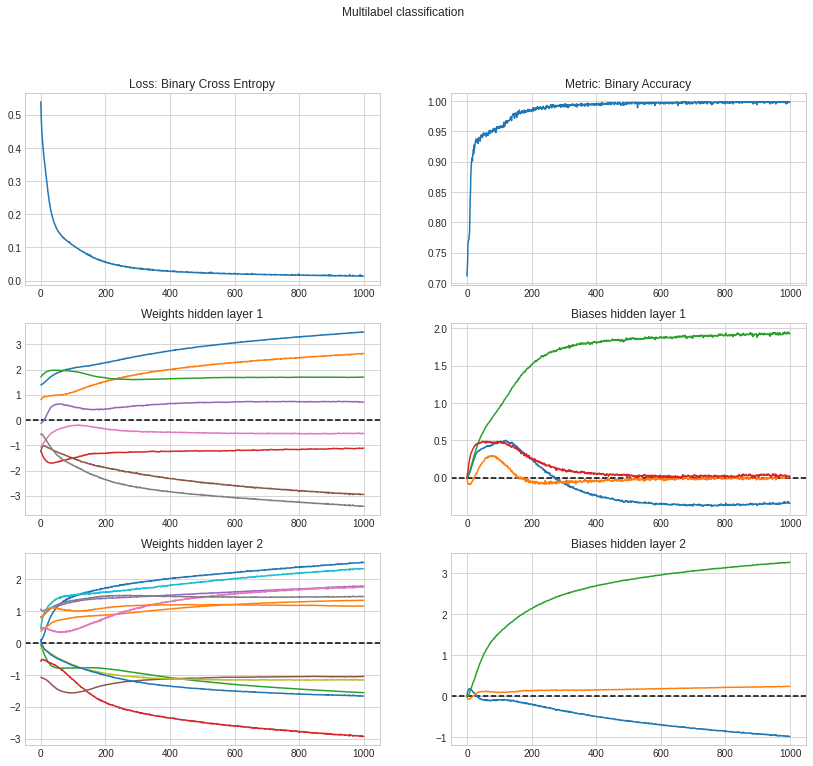

In [8]:
def plot_weights(weights, ax):
    weights = np.array(weights)
    ax.axhline(0, color='black', linestyle='dashed')
    for i in range(weights.shape[1]):
        for j in range(weights.shape[2]):
            ax.plot(weights[:,i,j])
    
def plot_biases(biases, ax):
    biases = np.array(biases)
    ax.axhline(0, color='black', linestyle='dashed')
    for i in range(biases.shape[1]):
        ax.plot(biases[:,i])


fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14,12))
fig.suptitle('Multilabel classification')
    
ax[0,0].plot(train_hist.history["loss"])
ax[0,0].set_title("Loss: Binary Cross Entropy")

ax[0,1].plot(train_hist.history["binary_accuracy"])
ax[0,1].set_title("Metric: Binary Accuracy")

plot_weights(all_w1, ax[1,0])
ax[1,0].set_title("Weights hidden layer 1")

plot_biases(all_b1, ax[1,1])
ax[1,1].set_title("Biases hidden layer 1")

plot_weights(all_w2, ax[2,0])
ax[2,0].set_title("Weights hidden layer 2")

plot_biases(all_b2, ax[2,1])
ax[2,1].set_title("Biases hidden layer 2");

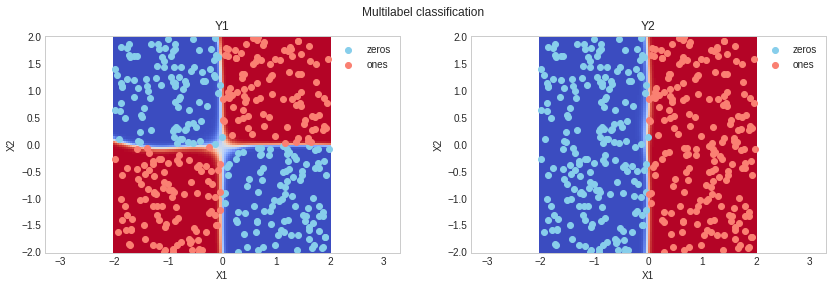

In [9]:
def subplot_surface(x1, x2, y, ax):
    ax.pcolormesh(x1, x2, y, vmin=0, vmax=1, cmap="coolwarm", shading='auto')
    #plt.colorbar()
    #plt.xlabel('X1')
    #plt.ylabel('X2')
    ax.axis("equal")
    #plt.show()
    
def plot_surface(minimum, maximun, resolution):
    
    # GENERATE GRID X DATA
    x1_indexes = np.linspace(minimum, maximun, resolution)
    x2_indexes = np.linspace(minimum, maximun, resolution)
    x1, x2 = np.meshgrid(x1_indexes, x2_indexes)
    x_grid = np.hstack(( x1.reshape(resolution*resolution,-1), x2.reshape(resolution*resolution,-1) ))
    
    # FOWARD MODEL
    preds = model.predict(x_grid)
    p1    = preds[:,0].reshape(resolution, resolution)
    p2    = preds[:,1].reshape(resolution, resolution)
    
    # SUBPLOTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    fig.suptitle('Multilabel classification')
    subplot_surface(x1, x2, p1, ax1)
    subplot_surface(x1, x2, p2, ax2)
    subplot_points(x, y[:,0], ax1, "Y1")
    subplot_points(x, y[:,1], ax2, "Y2")

plot_surface(minimum=-2, maximun=2, resolution=100)

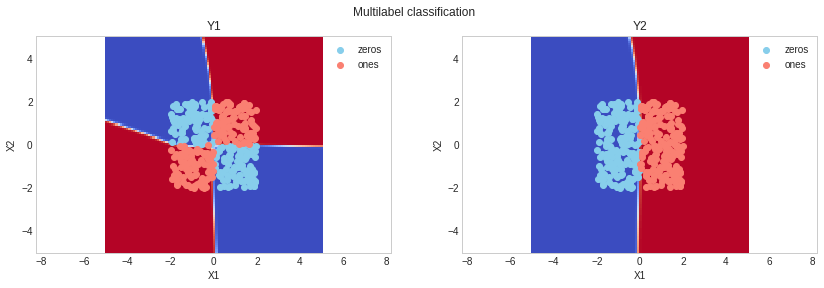

In [10]:
plot_surface(minimum=-5, maximun=5, resolution=100)

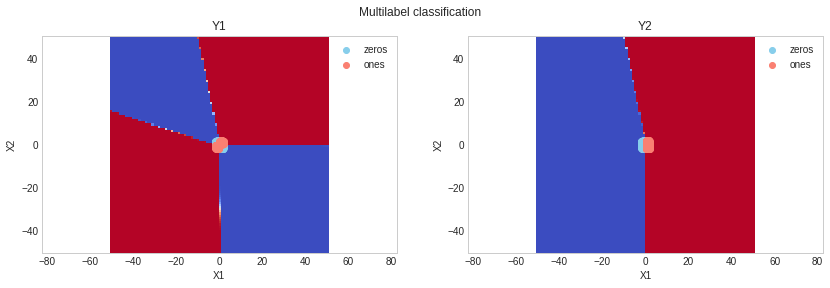

In [11]:
plot_surface(minimum=-50, maximun=50, resolution=100)